#  Analyse et Conception des Algorithmes
Youssef Mourane <br>


Partie 1 :<br>
 la fonction " Affichage_Non_Orienté " prend les positions des nœuds et les arêtes comme arguments,
 puis affiche les nœuds en tant que points gris clair avec leur nom et trace des lignes entre les nœuds reliés.

In [2]:
import matplotlib.pyplot as plt

def Affichage_Non_Orienté(positions, arêtes):
    """
    Fonction pour afficher un graphe non orienté.

    Args:
        positions (dict): Un dictionnaire contenant les noms des nœuds comme clés et les coordonnées (x, y) comme valeurs.
        arêtes (list): Une liste de tuples représentant les arêtes (connexions) entre les nœuds.


    """
    fig, ax = plt.subplots() 
    
   # Affiche les nœuds avec leur étiquette

    for node, (x, y) in positions.items(): 
        ax.plot(x, y, 'o', markersize=30, color='lightgrey')  
        ax.text(x, y, node, ha='center', va='center', zorder=3, fontsize=12) 

    # Trace les arêtes   
    for i in arêtes: 
        x_coords = [positions[i[0]][0], positions[i[1]][0]] 
        y_coords = [positions[i[0]][1], positions[i[1]][1]] 
        ax.plot(x_coords, y_coords, 'k-', zorder=1) 

     # Définit les limites de l'axe   
    ax.set_xlim(-0.5, 5.5) 
    ax.set_ylim(-0.5, 3.5) 
    ax.axis('off') 
 
     # Ajoute un texte sous la figure
    plt.figtext(0.5, -0.05, "Affichage arbre non-orienté.", ha="center", fontsize=10) 
    
    plt.show() 

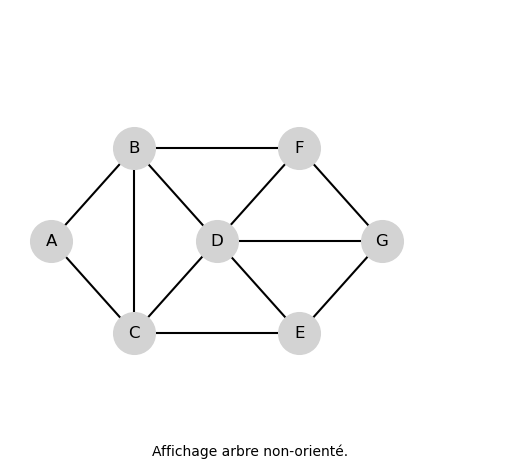

In [3]:
# exemple :

positions = { 
    'A': (0, 1),
    'B': (1, 2),
    'C': (1, 0),
    'D': (2, 1),
    'E': (3, 0),
    'F': (3, 2),
    'G': (4, 1),
}

arêtes = [('A', 'B'),('A', 'C'),('B', 'C'),('B', 'F'),('B', 'D'),('C', 'D'),('C', 'E'),('D', 'E'),('D', 'F'),('D', 'G'),('E', 'G'),('F', 'G'),]

Affichage_Non_Orienté(positions, arêtes)


Partie 2 :<br>
  Pour adapter la fonction "Affichage_Non_Orienté" afin qu'elle puisse afficher un graphe orienté, 
  nous devons modifier la façon   dont les arêtes sont tracées pour refléter la direction des arêtes.

In [4]:
import matplotlib.pyplot as plt

def Affichage_Graphe_oriente(positions, arêtes, orienté=False, espace_flèche=0.1, espace_noeud=0.1):
    fig, ax = plt.subplots()

    # Affiche les nœuds avec leur étiquette
    for node, (x, y) in positions.items():
        ax.plot(x, y, 'o', markersize=30, color='lightgrey')
        ax.text(x, y, node, ha='center', va='center', zorder=3, fontsize=12)

    # Trace les arêtes
    for edge in arêtes:
        x_coords = [positions[edge[0]][0], positions[edge[1]][0]]
        y_coords = [positions[edge[0]][1], positions[edge[1]][1]]
        if orienté:
            # Si le graphe est orienté, utilise une flèche pour représenter l'arête
            angle = np.arctan2(y_coords[1] - y_coords[0], x_coords[1] - x_coords[0])
            x_start = x_coords[0] + (1 - espace_noeud) * espace_flèche * np.cos(angle)
            y_start = y_coords[0] + (1 - espace_noeud) * espace_flèche * np.sin(angle)
            x_end = x_coords[1] - (1 - espace_noeud) * espace_flèche * np.cos(angle)
            y_end = y_coords[1] - (1 - espace_noeud) * espace_flèche * np.sin(angle)
            ax.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                        arrowprops=dict(arrowstyle="->", color='black'))
        else:
            # Si le graphe est non orienté, utilise une ligne simple
            ax.plot(x_coords, y_coords, 'k-', zorder=1)

    # Définit les limites de l'axe
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(-0.5, 3.5)
    ax.axis('off')

    # Ajoute un texte sous la figure
    graphe_type = "orienté" if orienté else "non orienté"
    plt.figtext(0.5, -0.05, f"Affichage graphe {graphe_type}.", ha="center", fontsize=10)


    plt.show()


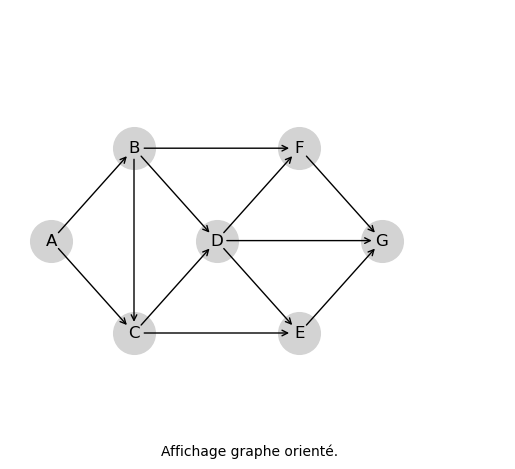

In [5]:
# exemple :
Affichage_Graphe_oriente(positions, arêtes, orienté=True, espace_flèche=0.1)

parte 3 : 
- "__init__(self, graph, positions, start_node)" : Initialise un objet GraphAnimator avec le graphe, 
  les positions des nœuds et le nœud de départ pour le parcours en largeur.
- " adjust_edge_position(self, start, end)" : Ajuste les positions des arêtes pour éviter qu'elles ne pénètrent dans les nœuds.
- " draw_graph(self, ax, frame_colors) " : Dessine le graphe avec les couleurs des nœuds données.
- " bfs(self) ": Effectue un parcours en largeur (BFS) du graphe pour obtenir l'ordre de visite des nœuds.
- "create_frames(self) " : Crée les frames de l'animation en fonction de l'ordre de visite BFS.
- " animate_bfs(self, interval=1000) " : Anime le parcours en largeur du graphe, en utilisant les frames créées.

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np 
from matplotlib.patches import FancyArrowPatch 
from collections import deque 
from IPython.display import HTML
class GraphAnimator:
    def __init__(self, graph, positions, start_node):
        """
        Initialise un objet GraphAnimator.

        Arguments :
        - graph : dictionnaire représentant le graphe sous forme de liste d'adjacence
        - positions : dictionnaire des positions des nœuds
        - start_node : nœud de départ du parcours en largeur
        """
        # Initialisation des attributs de l'objet
        self.graph = graph
        self.positions = positions
        self.colors = {node: 'lightgrey' for node in graph}
        self.colors[start_node] = 'red'
        self.start_node = start_node
        self.node_size = 0.15
        self.frames = []
        self.bfs_order = []

    def adjust_edge_position(self, start, end):
        """
        Ajuste les positions des arêtes pour qu'elles ne pénètrent pas dans les nœuds.

        Arguments :
        - start : position de départ de l'arête
        - end : position de fin de l'arête
        """
        # Calcul de la direction et de la longueur de l'arête
        direction = np.array(end) - np.array(start)
        length = np.linalg.norm(direction)
        direction = direction / length
        
        # Ajustement des positions pour éviter que l'arête ne pénètre dans les nœuds
        start_adjusted = np.array(start) + direction * self.node_size
        end_adjusted = np.array(end) - direction * self.node_size
        return start_adjusted, end_adjusted

    def draw_graph(self, ax, frame_colors):
        """
        Dessine le graphe avec les couleurs des nœuds données.

        Arguments :
        - ax : axe matplotlib pour le dessin
        - frame_colors : dictionnaire des couleurs des nœuds
        """
        # Efface l'axe et configure les limites et l'aspect
        ax.clear()
        ax.set_xlim(-1, 6)
        ax.set_ylim(0, 4)
        ax.set_aspect('equal')
        ax.axis('off')

        # Dessine les arêtes
        for node, neighbors in self.graph.items():
            for neighbor in neighbors:
                start_pos = self.positions[node]
                end_pos = self.positions[neighbor]
                start_adjusted, end_adjusted = self.adjust_edge_position(start_pos, end_pos)
                ax.plot([start_adjusted[0], end_adjusted[0]], [start_adjusted[1], end_adjusted[1]], 'black', linewidth=2)

         # Dessine les nœuds avec les couleurs et les textes appropriés       
        for node, pos in self.positions.items():
            ax.plot(pos[0], pos[1], 'o', markeredgecolor='black', markeredgewidth=2, color=frame_colors[node], markersize=30)
            ax.text(pos[0], pos[1], node, color='black', ha='center', va='center', fontsize=12, fontweight='bold')

    def bfs(self):
        """
        Parcourt le graphe en largeur (BFS) pour obtenir l'ordre de visite des nœuds.

        """
        # Initialisation des variables de parcours
        visited = {node: False for node in self.graph}
        queue = deque([(self.start_node, 0)])
        visited[self.start_node] = True
        order = []

        # Parcours en largeur
        while queue:
            node, depth = queue.popleft()
            order.append((node, depth))
            for neighbor in self.graph[node]:
                if not visited[neighbor]:
                    queue.append((neighbor, depth + 1))
                    visited[neighbor] = True
        return order

    def create_frames(self):
        """
        Crée les frames de l'animation en fonction de l'ordre de visite BFS.
        """
        self.bfs_order = self.bfs()
        
        # Calcul des couleurs pour chaque étape de l'animation
        all_nodes = set(self.graph.keys())
        visited_nodes = set(node for node, _ in self.bfs_order)
        remaining_nodes = all_nodes - visited_nodes

        for node in remaining_nodes:
            self.bfs_order.append((node, max(depth for _, depth in self.bfs_order) + 1))

        frame_colors = self.colors.copy()
        color_palette = ['red', 'green', 'blue', 'orange', 'yellow', 'purple', 'pink']
        for i, (node, depth) in enumerate(self.bfs_order):
            frame_colors[node] = color_palette[depth % len(color_palette)]
            self.frames.append(frame_colors.copy())

    def animate_bfs(self, interval=1000):
        """
        Anime le parcours en largeur du graphe.

        Arguments :
        - interval : intervalle de temps entre chaque frame de l'animation (en millisecondes)

        """
        
        fig, ax = plt.subplots()

        # Fonction de mise à jour pour chaque frame de l'animation
        def update(frame):
            ax.clear()
            self.draw_graph(ax, self.frames[frame])

        anim = animation.FuncAnimation(fig, update, frames=len(self.frames), interval=interval, repeat=False)
        plt.close(fig)  
        return anim

    
    
    
# Exemple :

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'C', 'F'],
    'C': ['A', 'E', 'D'],
    'D': ['B', 'E', 'F', 'G'],
    'E': ['C', 'D', 'G'],
    'F': ['B', 'D', 'G'],
    'G': ['E', 'F'],
}

positions = {
    'A': (0, 2),
    'B': (1, 3),
    'C': (1, 1),
    'D': (2, 2),
    'E': (3, 1),
    'F': (3, 3),
    'G': (4, 2),
}



# Créer une instance de GraphAnimator
animator = GraphAnimator(graph, positions, 'A')

# Générer les frames pour l'animation
animator.create_frames()

# Obtenir l'animation
animation = animator.animate_bfs()

# Afficher l'animation
html = HTML(animation.to_jshtml())
html

